<a href="https://colab.research.google.com/github/AnshVashisth0/AnshVashisth0/blob/main/TASK_3_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



TASK 3: IRIS FLOWER CLASSIFICATION

Done by: Ansh Vashisth


# **Project Summary -**

The primary objective of this project is to develop a machine learning model that can accurately classify Iris flowers into their respective species (setosa, versicolor, and virginica) based on their sepal and petal measurements.

Dataset:
The Iris flower dataset, introduced by British statistician and biologist Ronald Fisher in 1936, consists of 150 samples from three species of Iris flowers:

Iris setosa
Iris versicolor
Iris virginica
Each sample includes four features:

Sepal length (cm)
Sepal width (cm)
Petal length (cm)
Petal width (cm)




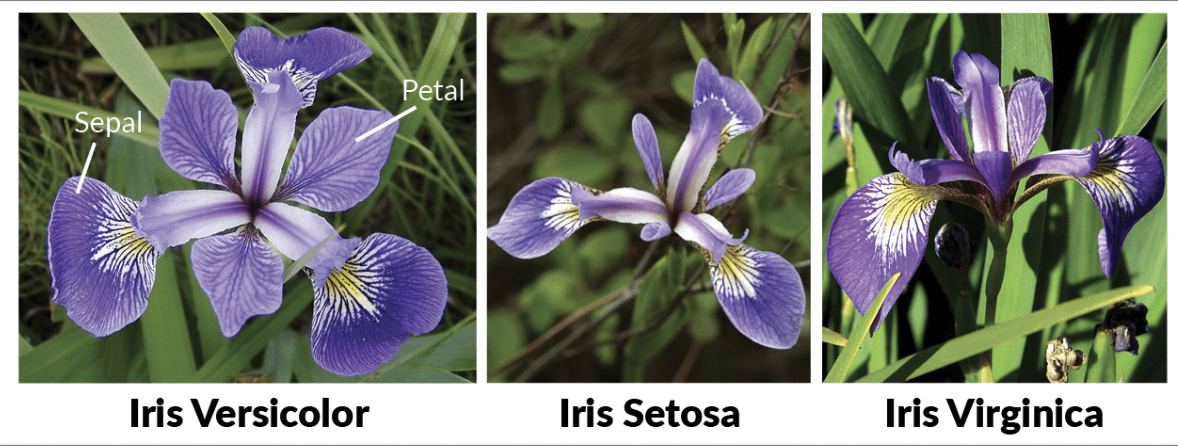

## PROBLEM STATEMENT

* Perform data preprocessing including loading the dataset, checking for missing values, and basic statistics.

* Split the dataset into features (sepal and petal measurements) and labels (species).

* Explore the dataset through visualizations to understand the distribution of species and relationships between features.

* Train a machine learning model, such as RandomForestClassifier, using the training data.

* Evaluate the trained model's performance using accuracy, classification report, and confusion matrix.


## ADDRESSING THE PROBLEM

* Define the classification problem: accurately classify Iris flowers into setosa, versicolor, and virginica species based on their sepal and petal measurements.

* Familiarize with the Iris dataset, consisting of 150 samples with four features: sepal length, sepal width, petal length, and petal width, categorized into three species.

* Load the dataset and explore its structure.

* Check for missing values or anomalies.

* Split the data into training and testing sets.

* Select suitable machine learning algorithms for classification tasks (e.g., logistic regression, decision trees, support vector machines).

* Train multiple models using the training data.

* Evaluate model performance using cross-validation techniques.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = pd.read_csv('/content/IRIS.csv')

### Dataset First View

In [3]:
# Dataset First Look
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
iris.shape

(150, 5)

### Dataset Information

In [5]:
# Dataset Info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
num_duplicate_rows = iris.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the iris dataset:", num_duplicate_rows)

Number of Duplicate Rows in the iris dataset: 3


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values_count = iris.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## ***2. Understanding Your Variables***

In [8]:
# Display class distribution
print("\nClass distribution:")
print(iris['species'].value_counts())



Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [9]:
# Dataset Columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# Dataset Describe
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. ***Data Wrangling***

In [11]:
# Remove duplicate rows
iris.drop_duplicates(inplace=True)

In [12]:
# Dataset Duplicate Value Count
num_duplicate_rows = iris.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the iris dataset:", num_duplicate_rows)

Number of Duplicate Rows in the iris dataset: 0


In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. ***EDA (Exploratory data Analysis)***

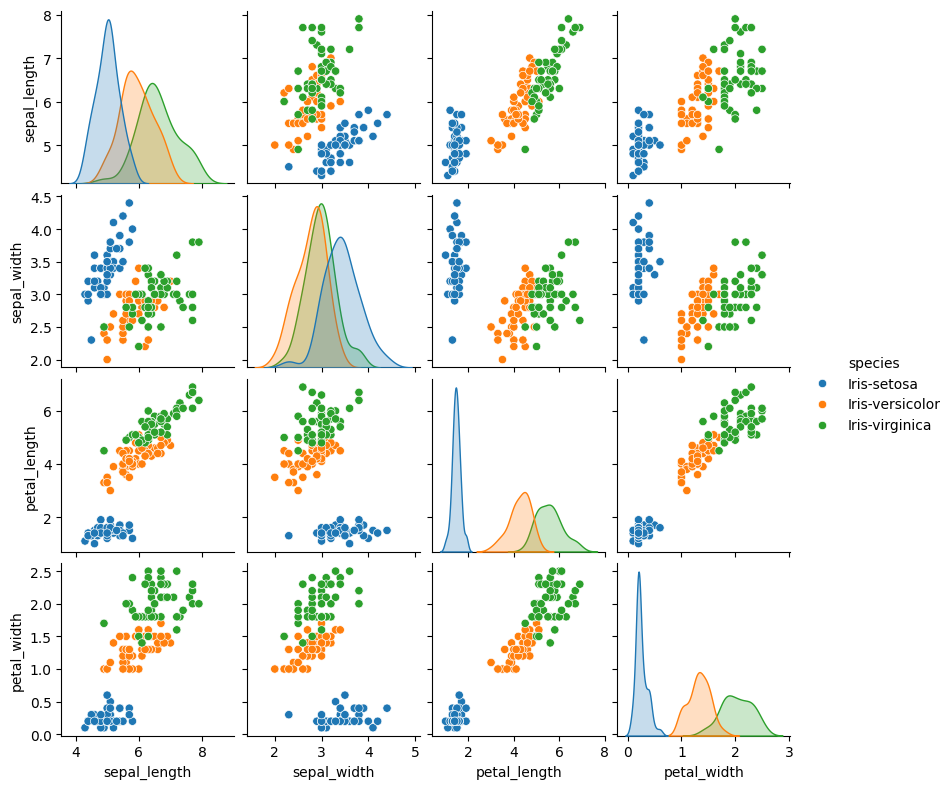

In [14]:
sns.pairplot(iris, hue = 'species', height=2)

## 5. ***Feature Engineering***

In [15]:
# Feature Engineering: Creating interaction features
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

# Display the first few rows with new features
print("\nFirst few rows with new features:")
print(iris.head())


First few rows with new features:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_area  petal_area  
0       17.85        0.28  
1       14.70        0.28  
2       15.04        0.26  
3       14.26        0.30  
4       18.00        0.28  


In [16]:
# Feature Scaling: Standardizing the feature values
scaler = StandardScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area']
iris[features] = scaler.fit_transform(iris[features])

# Display the first few rows with scaled features
print("\nFirst few rows with scaled features:")
print(iris.head())


First few rows with scaled features:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0     -0.915509     1.019971     -1.357737      -1.3357  Iris-setosa   
1     -1.157560    -0.128082     -1.357737      -1.3357  Iris-setosa   
2     -1.399610     0.331139     -1.414778      -1.3357  Iris-setosa   
3     -1.520635     0.101529     -1.300696      -1.3357  Iris-setosa   
4     -1.036535     1.249582     -1.357737      -1.3357  Iris-setosa   

   sepal_area  petal_area  
0   -0.001997   -1.186654  
1   -0.935951   -1.186654  
2   -0.835144   -1.190920  
3   -1.066409   -1.182388  
4    0.042477   -1.186654  


In [17]:
# Encoding categorical variables: Using one-hot encoding for the 'species' column
iris_encoded = pd.get_dummies(iris, columns=['species'])

# Display the first few rows of the final dataset
print("\nFirst few rows of the final dataset:")
print(iris_encoded.head())

# Display the final shape of the dataset
print("\nFinal shape of the dataset:")
print(iris_encoded.shape)


First few rows of the final dataset:
   sepal_length  sepal_width  petal_length  petal_width  sepal_area  \
0     -0.915509     1.019971     -1.357737      -1.3357   -0.001997   
1     -1.157560    -0.128082     -1.357737      -1.3357   -0.935951   
2     -1.399610     0.331139     -1.414778      -1.3357   -0.835144   
3     -1.520635     0.101529     -1.300696      -1.3357   -1.066409   
4     -1.036535     1.249582     -1.357737      -1.3357    0.042477   

   petal_area  species_Iris-setosa  species_Iris-versicolor  \
0   -1.186654                 True                    False   
1   -1.186654                 True                    False   
2   -1.190920                 True                    False   
3   -1.182388                 True                    False   
4   -1.186654                 True                    False   

   species_Iris-virginica  
0                   False  
1                   False  
2                   False  
3                   False  
4               

## 6. ***Model Building***

In [18]:
# Splitting the data into features and target
X = iris_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y = iris_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Convert one-hot encoded predictions and y_test back to single labels
y_test_labels = y_test.idxmax(axis=1)
y_pred_labels = pd.DataFrame(y_pred, columns=y_test.columns).idxmax(axis=1)

In [19]:
y_test.head()

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
127,False,False,True
53,False,True,False
140,False,False,True
19,True,False,False
106,False,False,True


## 7. ***Model Evaluation***

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

In [21]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9333333333333333

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]

Classification Report:
                         precision    recall  f1-score   support

    species_Iris-setosa       1.00      1.00      1.00        11
species_Iris-versicolor       0.90      0.90      0.90        10
 species_Iris-virginica       0.89      0.89      0.89         9

               accuracy                           0.93        30
              macro avg       0.93      0.93      0.93        30
           weighted avg       0.93      0.93      0.93        30

